In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd

 

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/Hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
LastDate = session.query(measurement.date).order_by(measurement.date.desc()).first().date
LastDate

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
OneYearBeforeLastDate = dt.datetime.strptime(LastDate, '%Y-%m-%d') - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
DateList = session.query(measurement.date,func.max(measurement.prcp)).\
    filter(measurement.date >= OneYearBeforeLastDate).\
    group_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(DateList,columns=['Date','Precipitation'])
df = df.set_index(['Date'])
df = df.dropna()

# Sort the dataframe by date
df = df.sort_values(by='Date',ascending= True)
df.head()



,Precipitation
Date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07


<function matplotlib.pyplot.show(close=None, block=None)>

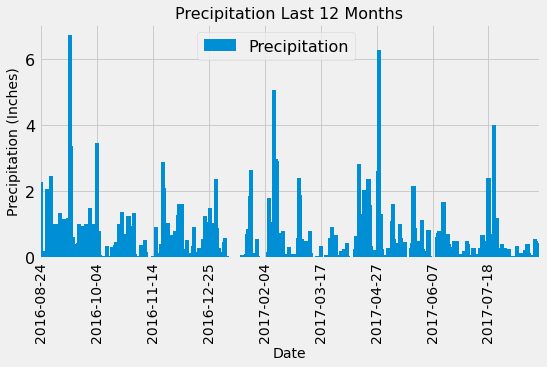

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation for the past 12 months
ax = df.plot(kind='bar', width=3, figsize=(8,4))
plt.locator_params(axis='x', nbins=9)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=16)
plt.ylabel("Precipitation (Inches)", size=14)
plt.xlabel("Date", size=14)
plt.show

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,Precipitation
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stationList = session.query(measurement.station).distinct()
stationList.count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
StationList = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by((func.count(measurement.station)).desc()).\
    all()
StationList


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
MostActiveStation = StationList[0][0]

session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == MostActiveStation).\
group_by(measurement.station).\
all()



[('USC00519281', 54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

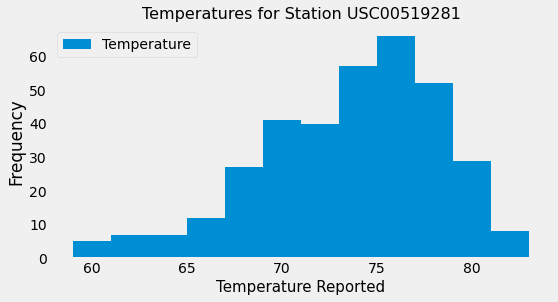

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

ActiveStation = session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == MostActiveStation).\
    filter(measurement.date >= OneYearBeforeLastDate).\
    all()
ActiveStation
Tempdf = pd.DataFrame(ActiveStation,columns=['station','Temperature'])
Tempdf.set_index('station', inplace=True)
Tempdf.head()


Tempdf.plot.hist(by='station', bins=12, figsize=(8,4))
plt.grid()
plt.title("Temperatures for Station " + MostActiveStation, fontsize=16)
plt.xlabel("Temperature Reported", fontsize=15)
plt.legend(fontsize=14)
plt.show


# Close session

In [18]:
# Close Session
session.close()